[View in Colaboratory](https://colab.research.google.com/github/jyw7664/TIL/blob/master/%EA%B5%AD%EB%AF%BC%EC%B2%AD%EC%9B%90wordcloud%EC%8B%9C%EA%B0%81%ED%99%94.ipynb)

https://github.com/lovit/soynlp

In [1]:
# 한국어 자연어처리를 위한 라이브러리인 soynlp을 사용해 시각화해보자.

!pip install soynlp

  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 1.5MB 4.3MB/s 


In [7]:
!pip show soynlp

Name: soynlp
Version: 0.0.46
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.6/dist-packages
Requires: psutil, numpy
Required-by: 


In [0]:
import pandas as pd
import numpy as np
import re

In [0]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', 
                 parse_dates=['start', 'end'])

In [10]:
p = r'.*(반려동물).*'   # 반려동물 분야의 데이터를 p에 할당
pet = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]   # pet데이터프레임에 

pet.shape   # pet데이터프레임의 shape를 보기

(811, 8)

In [0]:
pet.head(50)

In [64]:
pet.tail(70)

,article_id,start,end,answered,votes,category,title,content
202144,261081,2018-06-03,2018-07-03,0,14,반려동물,반려동물이 함께 출입할 수 있는 카페 및 음식점을 허락 해 주세요.,안녕하세요?\n애완동물을 키우는 사람이 1천만명에 도달했다고 합니다.\n그만큼 관련...
202549,261634,2018-06-04,2018-07-04,0,5,반려동물,헨켈 코리아에서 일베충 짤라주세요,헨켈 코리아에 있는 일베충들 다 짤라주세요\n카테고리가 반려동물인 이유는 일베충은 ...
202654,261769,2018-06-04,2018-07-04,0,3,반려동물,반려동물에 대한 공약 금지 청원,"최근 지방선거에 출마하는 많은 후보들의 공약을 살펴보면\n""시민참여형 반려동물 동행..."
202664,261780,2018-06-04,2018-07-04,0,1,일자리,한달에 1억 벌기는 문제도 아니라는 수의사들,한달에 1억 벌기는 문제도 아니라는 수의사들\n반려동물 이천만명 시대\n한달에 1억...
203024,262219,2018-06-05,2018-07-05,0,24,반려동물,반려동물 관련법들을 더욱더 강화시켜주세요,강아지공장이나 학대받은 반려동물들을\n구조하려면 주인이 포기를 하지않는 이상 구조...
203177,262411,2018-06-05,2018-07-05,0,15,반려동물,반려동물을 키우는 사람에게 세금 징수 해주시기 바랍니다.,안녕하세요. 강아지 키우고 있는 애견인입니다. 한국도 다른 선진국처럼 반려동물을 키...
203401,262683,2018-06-05,2018-07-05,0,68,반려동물,소동물 전용병원 개설,"소동물(기니피그, 토끼, 햄스터 등) 전용병원 전국확대 개원을 청원합니다. 현재 대..."
203412,262696,2018-06-05,2018-07-05,0,6,성장동력,한달에 1억 벌기는 문제도 아니라는 수의사들,한달에 1억 벌기는 문제도 아니라는 수의사들\n반려동물 이천만명 시대\n한달에 1억...
203496,262795,2018-06-05,2018-07-05,0,5,일자리,"반려동물 2천만명시대, 수의사 절대부족",반려동물 2천만명시대 입니다.\n그런데 아직도 수의대 입학정원은 수십년 전의 연 5...
203579,262890,2018-06-05,2018-07-05,0,1,성장동력,"반려동물 2천만명시대, 수의사 절대부족",반려동물 2천만명시대 입니다.\n그런데 아직도 수의대 입학정원은 수십년 전의 연 5...


In [13]:
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [0]:
# 샘플로 보고싶은 인덱스의 번호를 넣어준다
sample_index = 211110

In [20]:
sample_title = pet['title'][sample_index]
sample_title

'개.고양이 식용종식 전동연(개를 가축에서 제외하라)'

In [22]:
sample_content = pet['content'][sample_index]
sample_content

"대통령께 청원을 올리기에 앞서,\\n소중한 생명으로 태어나 감금틀에서 극한 고통을 받다가\\n인간을 위해 희생되는 모든 농장동물들에게 잠시나마 깊은 사죄와 애도를 전합니다.\\n그리고 우리모두는 불필요한 육식을 줄이고,\\n동물들의 습성을 최대한 존중해주는 복지농장형으로 바뀌어 나가길 간절히 바라며,\\n법의 사각지대에서 수 십년 동안 세상에서 가장 끔찍하고 잔인하게 죽어가는\\n개와 고양이만이라도 제발 식용을 종식시켜 주시기를 오늘 청원하는 바입니다.\\n국어사전에도 없는 식용개라는 이름으로\\n7개월 후 고통 속에 죽기 위해 태어난 생명들...\\n그러나 얼굴색이 모두 달라도 다 같은 사람이 듯,\\n그들도 다 같은 개일 뿐입니다!\\n1.500만 반려인구의 그런 공감대 속에서 '개.고양이 식용금지' 문제는\\n국민청원에 1,200여 건으로 가장 많은 기록을 세우고 있고,\\n현재 국회에는 ''축산법의 가축에서 개를 제외하자''는\\n국회의원들의 법안이 발의되어 있습니다.\\n이 법안이 통과하면 개식용업자들의 유일한 법적 명분이 제거되고,\\n''모든 개는 동물보호법 상의 반려동물''이 되어 도살은 불법이 되고\\n개농장과 보신탕은 사라지게 되는겁니다!\\n이 획기적인 법안 통과를 위해서는 여론의 큰 힘을 보여줘야만 합니다!\\n이 청원의 20만 서명달성이 너무나 절실하고도 절박한 이유입니다!!\\n그 동안 비도덕적인 도살에 가족같은 아이들을 지켜주지 못한 죄책감과\\n잔인한 장면들에 애써 외면하셨던 반려가족 여러분...\\n지금이 기회입니다!\\n개식용을 종식시킬 수 있는 기회가 왔습니다!!\\n20만 서명으로 국회에 힘을 실어주세요!!\\n서명과 무한공유로 아이들을 살려주세요!!\\n어느 개농장을 가더라도 썪은 음식쓰레기를 주는 밥그릇은\\n그마저도 늘 비어 파리만 들끓고 있고\\n그 곁에 물그릇은 단 한 군데도 없었습니다.\\n이 뜨거운 여름 물 한 모금 못마시는 그 극한 고통!!\\n상상이 가시나요?!!\\n그리고 마지막의 순간은 친구가 보는 앞에

## 토큰화


In [23]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['개', '.', '고양이', '식용종식', '전동연', '(', '개를', '가축에서', '제외하라', ')']

In [25]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['대통령께', '청원을', '올리기에', '앞서', ',\\', 'n', '소중한', '생명으로', '태어나', '감금틀에서']

In [26]:
print(len(tokened_title))
print(len(tokened_content))

10
469


## 텍스트 데이터 전처리
- 개행문자 제거

In [0]:
def preprocessing(text):
  # 개행문자 제거
  text = re.sub('\\\\n', ' ', text)
  return text

In [29]:
# %time을 찍어주면 해당코드를 실행할 때 걸리는 시간을 출력해 준당
%time sentences = pet['content'].apply(preprocessing)

CPU times: user 5.56 ms, sys: 1.83 ms, total: 7.39 ms
Wall time: 14.3 ms


In [31]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 991 ms, sys: 13.1 ms, total: 1 s
Wall time: 1.01 s


36     [안녕하세요, ., 사람과, 동물과, 자연을, 소중하게, 생각하는, 국민으로서, 청...
165    [안녕하세요, ., 서울에, 살고, 있는, 30, 대, 직장인, 기혼, 여성입니다,...
177    [유기견이었던, 강아지를, 데려와서, 어느새, 12, 년이, 훌쩍, 넘도록, 키워오...
Name: content, dtype: object

In [32]:
tokens[sample_index][:10]

['대통령께', '청원을', '올리기에', '앞서', ',', '소중한', '생명으로', '태어나', '감금틀에서', '극한']

In [45]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [46]:
!pip install -q 'wordcloud[all]'

  wordcloud 1.4.1 does not provide the extra 'all'


In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = STOPWORDS, # 한국어는 해당이 없습니다. 한국어를 적용해 주려면 별도 처리가 필요합니다.
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

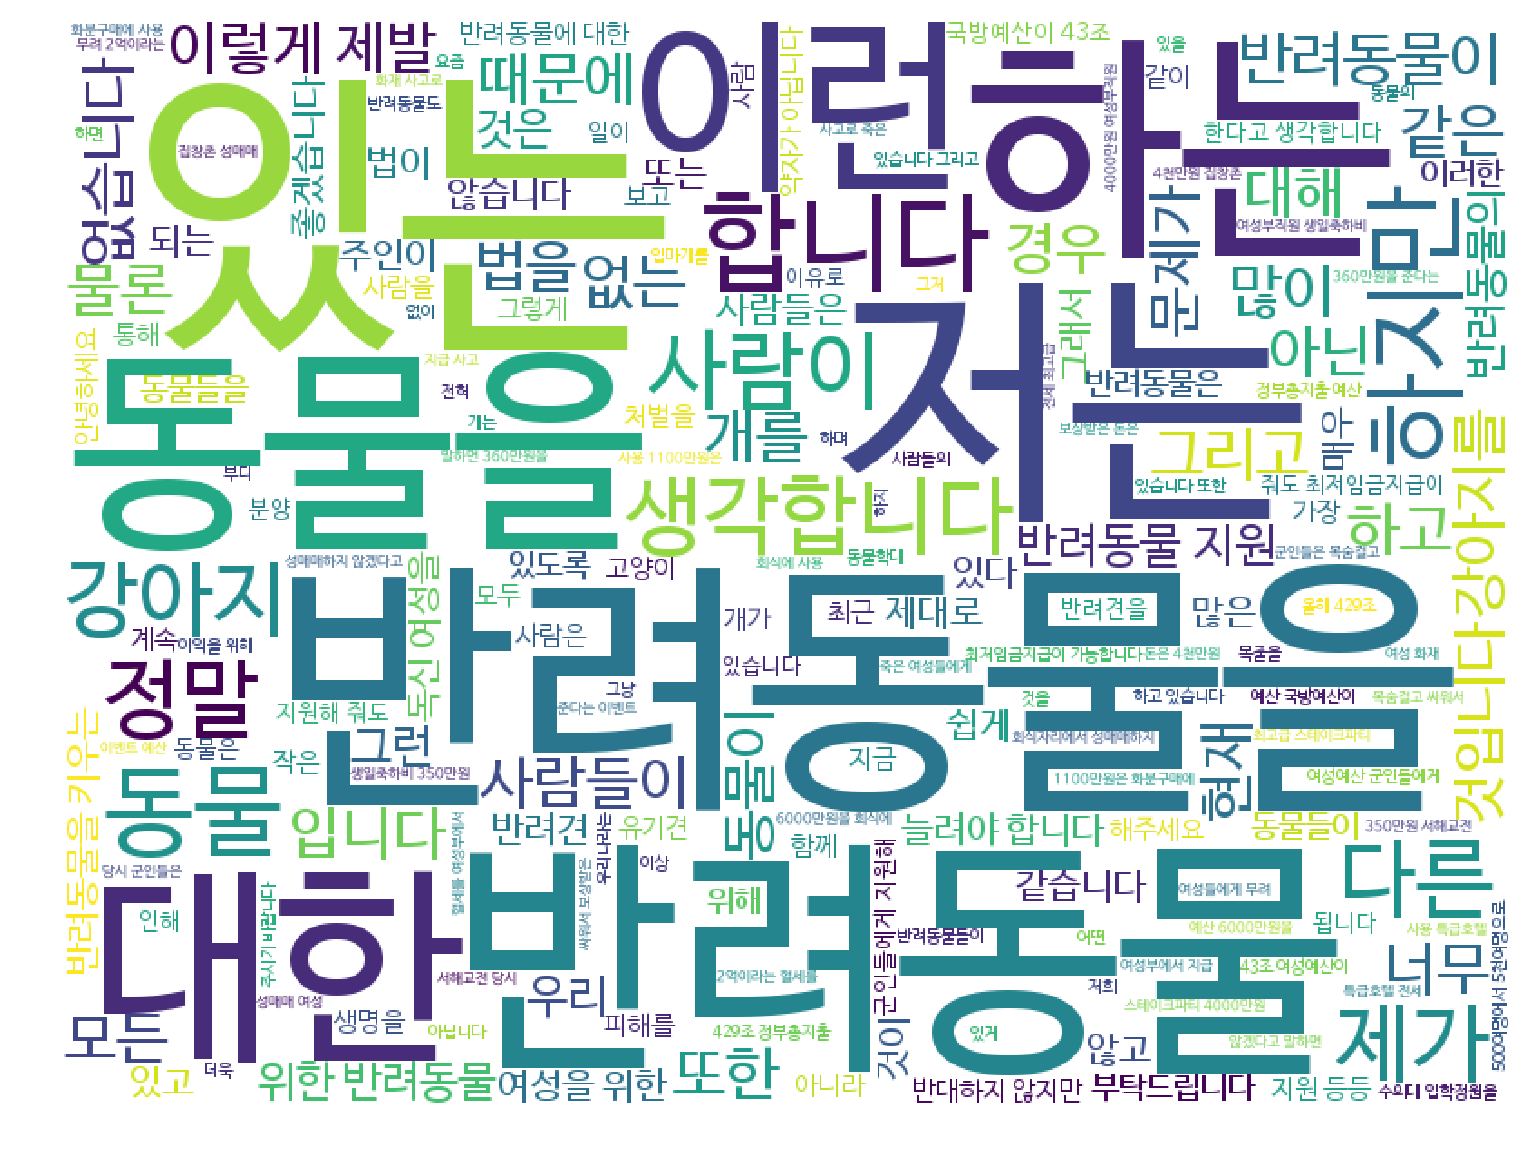

CPU times: user 2.99 s, sys: 255 ms, total: 3.24 s
Wall time: 3.13 s


In [49]:
%time displayWordCloud(' '.join(sentences))

In [0]:
# STOPWORDS불용어가 너무 많다!
from soynlp.noun import LRNounExtractor

In [53]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded
scanning completed
(L,R) has (11369, 6241) tokens
building lr-graph completedCPU times: user 1.41 s, sys: 18.2 ms, total: 1.43 s
Wall time: 1.43 s


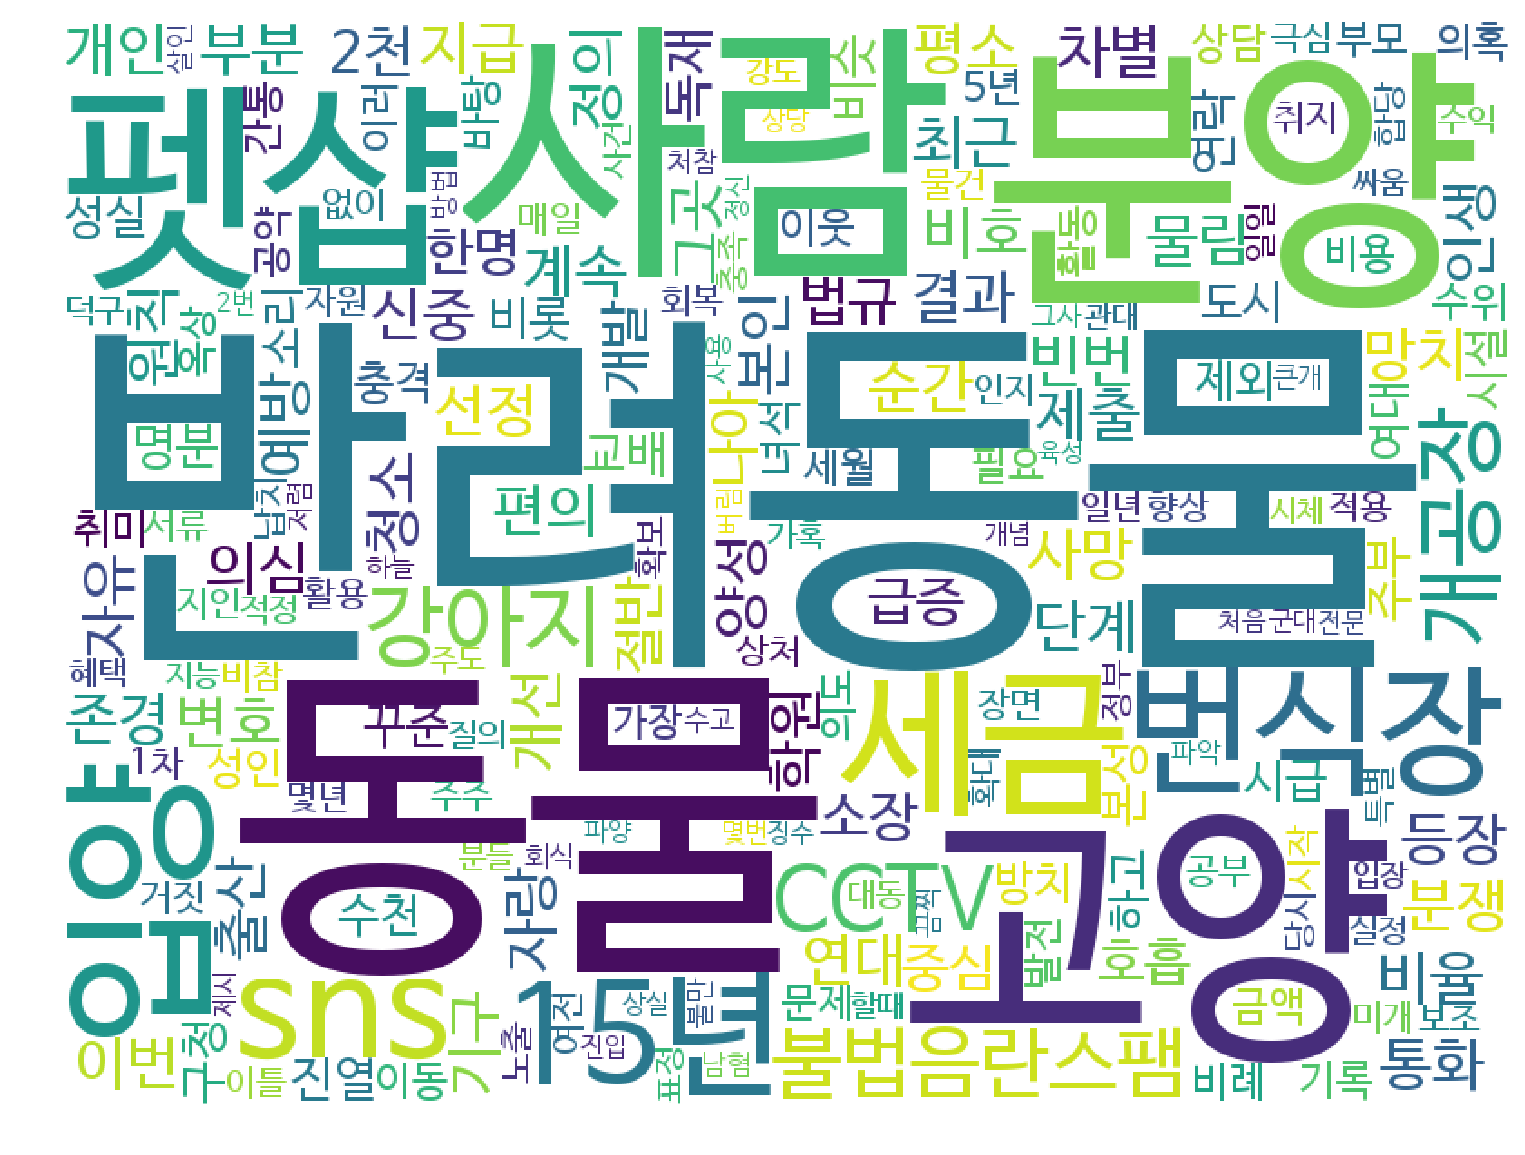

CPU times: user 1.55 s, sys: 170 ms, total: 1.72 s
Wall time: 1.61 s


In [62]:
# 추출된 명사를 찍어보자
%time displayWordCloud(' '.join(nouns))